#### Analysis of Currents and Non-Equilibrium
Use the whole system information to obtain the data of the current, the non-equilibrium, through the analysis of certain parameters, mostly of the trapped particle but also of the other particles.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
from scipy.stats import norm
from matplotlib.animation import FuncAnimation

# Parameters of the Simulation
tot_time = 180
# Stationary Time Selection
t_stat = 0
tot_runs = 100
fmag = 7.2
track_id = 11

# Get General Information of the Simulation: Frames, Time per Frame, Stationary Time Selection
dir_sample = r"./current/" + r"/data_wholesys_fmag7.2_ffreq1.0_100runs/" + "results.csv"
sample = pd.read_csv(dir_sample)
sample = sample[(sample["run_number"] == 1) & (sample["id"] == 1)]
frames_list = sample["frame"].tolist()
tot_frames = len(frames_list)
time_per_frame = tot_time / tot_frames
time_array = np.linspace(0, int(tot_time), int(tot_frames))
t_stat_idx = np.argmin(np.abs(time_array - t_stat))
n_data = len(time_array[t_stat_idx:-1])

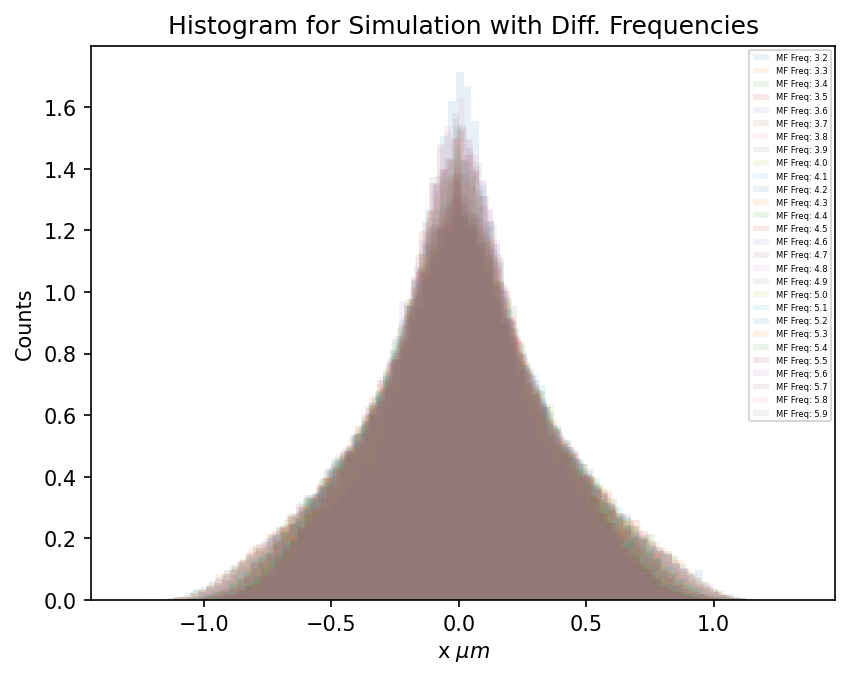

In [19]:
init_freq = 3.2
fin_freq = 6
freqs = np.round(np.arange(init_freq, fin_freq, 0.1), 2)

plt.figure(dpi=150)

for freq in freqs:
    dir_data = r"./current/" + f"/data_wholesys_fmag{fmag}_ffreq{freq}_{tot_runs}runs/" + "results.csv"
    data = pd.read_csv(dir_data)
    x_array = np.zeros(tot_runs * n_data)

    for i in range(tot_runs):
        part = data[(data["run_number"] == i + 1) & (data["id"] == track_id)]
        x_part = np.array(part.x_pos.tolist())
        x_part = x_part - x_part[0]
        x_array[n_data * i : n_data * (i + 1)] = x_part[t_stat_idx:-1]
    # Obtain Data for Graph
    plt.hist(x_array, bins=80, density=True, label=f"MF Freq: {freq}", alpha = 0.1)

plt.title("Histogram for Simulation with Diff. Frequencies")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts")
plt.legend(fontsize=4, loc='upper right')
plt.show()

First Analysis - Analysis of the MSD

A gaussian fit can tell us both how far the system is deviating from the "equilibrium state", the way the "tails" of the distribution behave, and also how could an "effective temperature" arise.

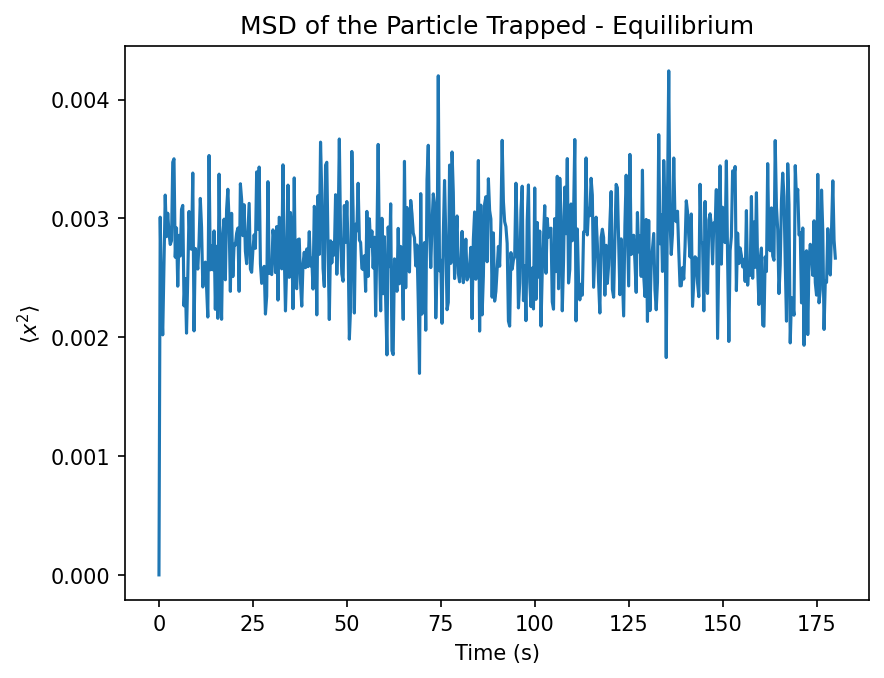

In [21]:
MSD_eq = np.zeros(tot_frames)

dir_data = r"./mag&freq/" + f"/data_fmag0_ffreq0_{tot_runs}runs/" + "results.csv"
data = pd.read_csv(dir_data)
x_0 = np.array(data[data["frame"] == frames_list[0]].x_pos.to_list())

for i in range(tot_frames-1):
    part = data[data["frame"] == frames_list[i+1]]
    x = np.array(part.x_pos.to_list())
    msd_t = np.mean(x**2)
    MSD_eq[i+1] = msd_t

plt.figure(dpi=150)
plt.plot(time_array, MSD_eq)
plt.title("MSD of the Particle Trapped - Equilibrium")
plt.xlabel("Time (s)")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.show()

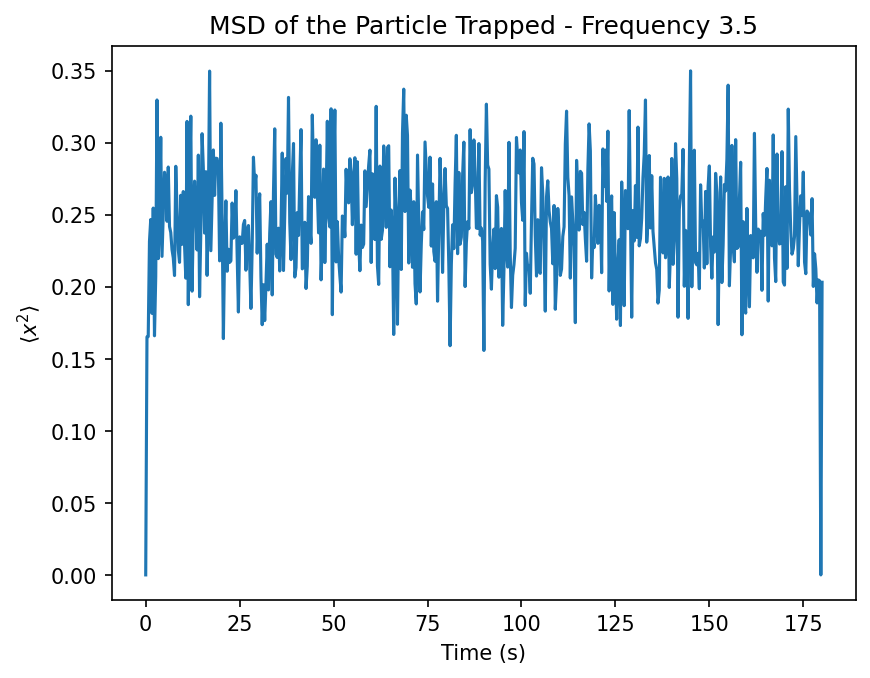

In [22]:
freq_msd = 3.5
MSD_freq = np.zeros(tot_frames)

dir_data = r"./current/" + f"/data_wholesys_fmag{fmag}_ffreq{freq_msd}_{tot_runs}runs/" + "results.csv"
data = pd.read_csv(dir_data)
x_0 = np.array(data[(data["frame"] == frames_list[i]) & (data["id"] == track_id)].x_pos.to_list())

for i in range(tot_frames -1):
    part = data[(data["frame"] == frames_list[i+1]) & (data["id"] == track_id)]
    x = np.array(part.x_pos.to_list())
    x = x - x_0
    msd_t = np.mean(x**2)
    MSD_freq[i + 1] = msd_t

plt.figure(dpi=150)
plt.plot(time_array, MSD_freq)
plt.title(f"MSD of the Particle Trapped - Frequency {freq_msd}")
plt.xlabel("Time (s)")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.show()

Make an Spectrum Regarding the different frequencies

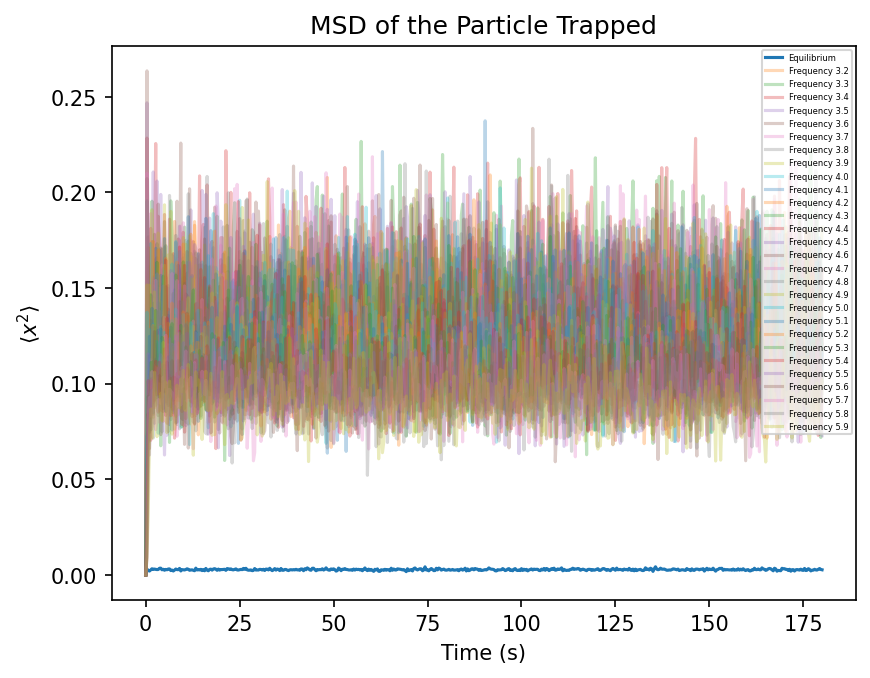

In [24]:
init_freq = 3.2
fin_freq = 6
freqs = np.round(np.arange(init_freq, fin_freq, 0.1), 2)

plt.figure(dpi=150)
plt.plot(time_array, MSD_eq, label = "Equilibrium")

for freq in freqs:
    dir_data = r"./current/" + f"/data_wholesys_fmag{fmag}_ffreq{freq}_{tot_runs}runs/" + "results.csv"
    data = pd.read_csv(dir_data)
    MSD_f = np.zeros(tot_frames)
    
    # Frame 1 - In same place
    part = data[(data["frame"] == frames_list[0]) & (data["id"] == track_id)]
    x_0 = np.array(part.x_pos.tolist())
    x = x_0 - x_0
    msd_t = np.mean(x**2)
    MSD_f[0] = msd_t

    # Start from the second frame
    for i in range(tot_frames-1):
        part = data[(data["frame"] == frames_list[i+1]) & (data["id"] == track_id)]
        x = np.array(part.x_pos.to_list())
        x = x - x_0
        msd_t = np.mean(x**2)
        MSD_f[i+1] = msd_t

    plt.plot(time_array, MSD_f, label=f"Frequency {freq}", alpha = 0.3)

plt.title(f"MSD of the Particle Trapped")
plt.xlabel("Time (s)")
plt.ylabel(r"$\langle x^2 \rangle$")
plt.legend(fontsize=4, loc='upper right')
plt.show()